In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/data.csv', index_col=0)

## 변환
- value, wage, release clause 통화 단위
- work rate ex.hight/hight -> 숫자로 변환(0~2/0~2)
- 

In [3]:
# 통화 변환-> 실수화
def exchange(value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M',''))*1000
    elif 'K' in out:
        out = float(out.replace('K',''))
    return float(out)

In [4]:
df.Value = df.Value.apply(lambda x: exchange(x))
df.Wage = df.Wage.apply(lambda x: exchange(x))
df['Release Clause'] = df['Release Clause'].astype('str')
df['Release Clause'] = df['Release Clause'].apply(lambda x: exchange(x))

In [5]:
wr = df['Work Rate'].str.split('/', expand=True)
df['Attack_WR']= wr[0]
df['Attack_WR'].replace({'High':2, 'Medium':1,'Low':0},inplace= True)
df['Defence_WR']=wr[1]
df['Defence_WR'].replace({' High':2, ' Medium':1,' Low':0},inplace= True)

## 결측치가 많은 칼럼, 불필요한 칼럼 삭제
- nan 48행 삭제
- club 없는 행 삭제(skill류도 모두 nan이라)

In [292]:
# 결측치가 많은 칼럼이나 불필요한 칼럼 삭제결측치가 많은 칼럼이나 불필요한 칼럼 삭제

In [6]:
# nan 행 삭제
nan_data=df.iloc[13236:13284,:]
nan_data.index
df.drop(nan_data.index,inplace = True)

In [7]:
# club nan 행 탐색
df.Club.fillna('non_club', inplace = True)
non_club_s=df[df.Club =='non_club'].index
df.drop(non_club_s,inplace = True)  

In [295]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## 파생변수 만들기

Age 범주화

In [8]:
# Age_C
def Age_2(x):
    if x <20 : return 1
    elif (20<= x <=22): return 2
    elif (23<= x <=24): return 3
    elif (25<= x <= 26): return 4
    elif (27<= x <= 29): return 5
    elif (30<= x <=31): return 6
    elif (32<= x <=33): return 7
    elif (34 ==x): return 8
    elif (35 <= x <= 38): return 9
    elif (39 ==x): return 10
    elif (40 <= x <= 45): return 11
df['Age_C'] = df.Age.apply(Age_2) 

Overall 범주화

In [9]:
# Over_C
def Over_2(x):
    if 46<= x <=62 : return 1
    elif 63<= x <=68 : return 2
    elif 69<= x <=72: return 3
    elif 73<= x <=75: return 4
    elif 76<= x <=78: return 5
    elif 79<= x <=80: return 6
    elif 81<= x <=82: return 7
    elif 83==x: return 8
    elif 84==x: return 9
    elif 85==x: return 10
    elif 86==x: return 11
    elif 87==x: return 12
    elif 88==x: return 13
    elif 89==x: return 14
    elif 90==x: return 15
    elif 91==x: return 16
    elif 92==x: return 17
    elif 93<= x <=94 : return 18
df['Over_C']=df.Overall.apply(Over_2)

Club 
1. Club_Value
2. Rich_Club
3. Overall_Club

In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

Club_Value

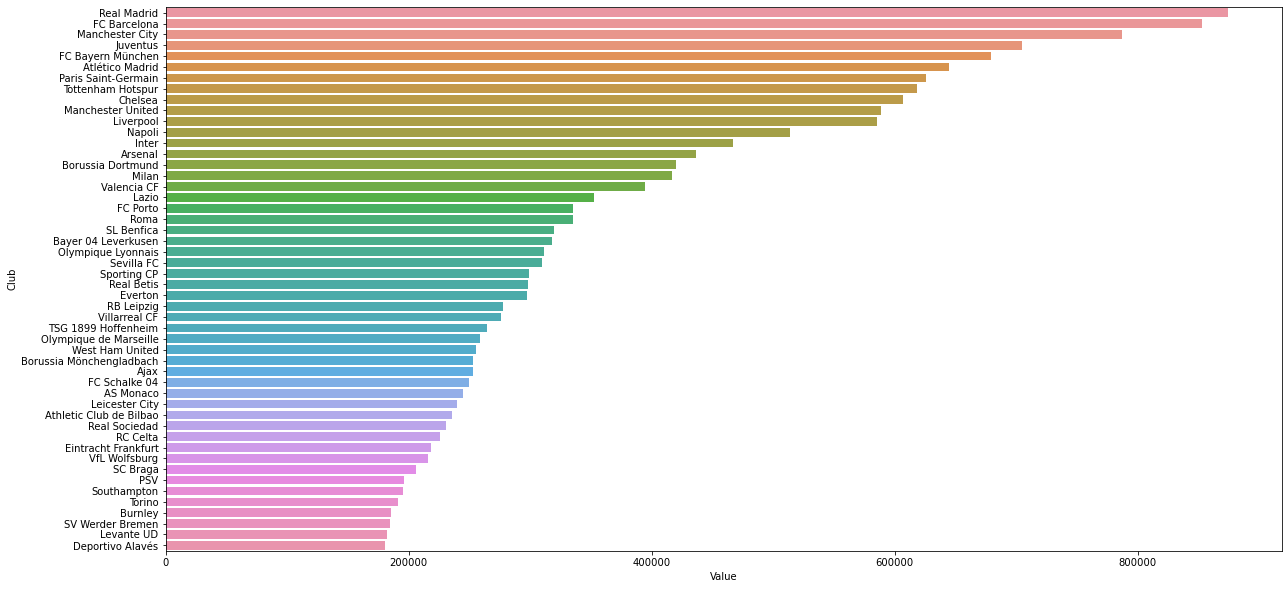

In [11]:
import seaborn as sns
# 클럽 구단 가치 
group = df.groupby('Club')['Value'].sum().reset_index().sort_values('Value', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Value', y = 'Club', data = group)

In [12]:
group = df.groupby(['Club'])[['Value']]
cmed= group.sum().sort_values(by=['Value'], ascending = False)
cmed.head()

,Value
Club,
Real Madrid,874425.0
FC Barcelona,852600.0
Manchester City,786555.0
Juventus,704475.0
FC Bayern München,679025.0


In [13]:
cmed.describe()

,Value
count,651.000000
mean,67395.591398
std,109255.819191
min,1930.000000
25%,15277.500000
50%,30520.000000
75%,65742.500000
max,874425.000000


In [14]:
club1=list(cmed.query('Value>=65742.5').index)
club1
club2=list(cmed.query('Value>=30520 & Value<65742.5').index)
club2
club3=list(cmed.query('Value>=15277.5 & Value <30520').index)
club4=list(cmed.query('Value<15277.5').index)
df.insert(7,'Club_Value',
            df.apply(lambda x: 
            3 if x['Club'] in club1
            else 2 if x['Club'] in club2
            else 1 if x['Club'] in  club3
            else 0, axis =1))

Rich_Club

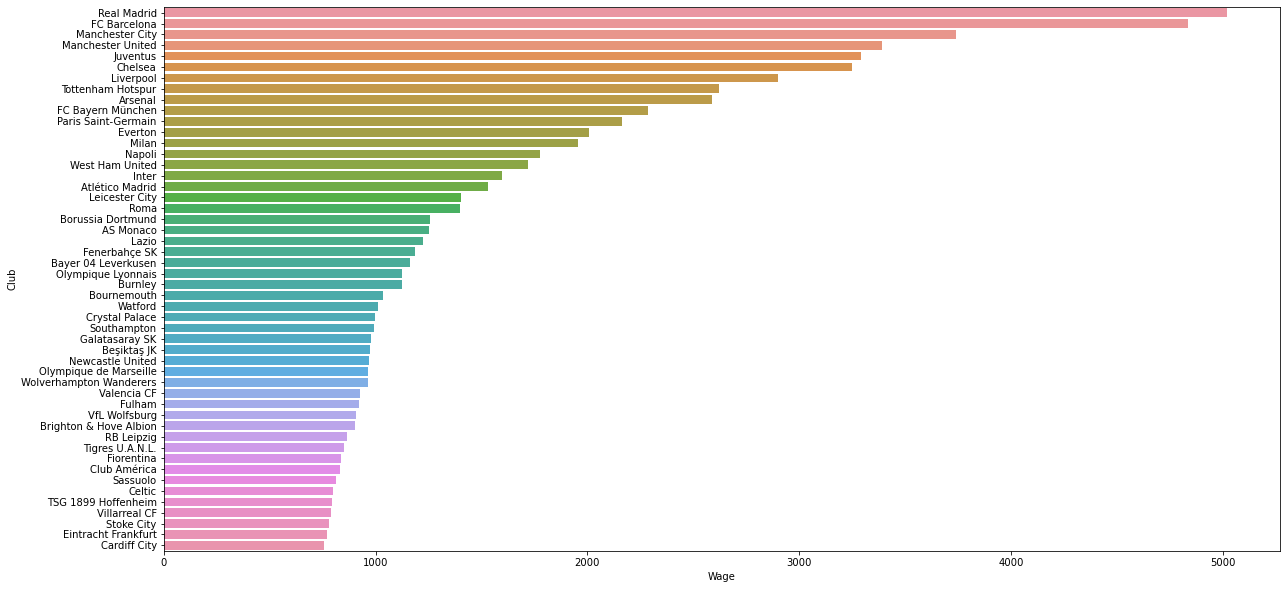

In [15]:
group3 = df.groupby('Club')['Wage'].sum().reset_index().sort_values('Wage', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Wage', y = 'Club', data = group3)

In [16]:
group3 = df.groupby(['Club'])[['Wage']]
cmed1= group3.sum().sort_values(by=['Wage'], ascending = False)

In [17]:
cmed1.describe()

,Wage
count,651.000000
mean,272.038402
std,499.444787
min,19.000000
25%,60.500000
50%,108.000000
75%,261.500000
max,5017.000000


In [18]:
club11=list(cmed1.query('Wage>=261.5').index)
club11
club22=list(cmed1.query('Wage>=108 & Wage<261.5').index)
club22
club33=list(cmed1.query('Wage>=60.5 & Wage <108').index)
club44=list(cmed1.query('Wage<60.5').index)
df.insert(7,'Rich_Club',
            df.apply(lambda x: 
            3 if x['Club'] in club11
            else 2 if x['Club'] in club22
            else 1 if x['Club'] in  club33
            else 0, axis =1))

## 불필요한 컬럼 1차 삭제
- 불필요
- 파생변수 만들 칼럼들:
- 다른 칼럼과 중복

In [35]:
df.drop(['Nationality','Work Rate','Photo', 'Flag','Club Logo',
        'ID','Body Type','Height', 'Weight',
        'Attack_WR', 'Defence_WR','Preferred Foot',
        'Release Clause'], axis=1, inplace = True)

In [308]:
# joined, contract Valid Unitil(기간 계산기간 계산)

In [36]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [37]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [38]:
df['Loaned From'].fillna(0,inplace=True)

In [39]:
# 파생변수 만들기 : 임대 선수 0, 구단 소속선수 1
def Loaned(df):
    if (df['Loaned From']==0):
        return 1
    else:
        return 0
df['Loaned']=df.apply(Loaned,axis=1)

Special_spc
- potential = overal +나이 점수(어릴수록 높음)
- special = sum

('Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle') - ('Compouser )

 그래서 special_spc = df.potential + df.special+ df.composure

In [23]:
df['Special_sp']=df.Special+df.Composure

Position_Score = 
가정,overall보다 Wage와 상관관계가 좋지 않을까?

In [24]:
# 파생변수 1 Position_Class
df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM',
                                                   'RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB',
                                                  'LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))

In [41]:
df1=df[df['Position']!='GK']
df1.head()

,Name,Age,Overall,Rich_Club,Club_Value,Position_Class,Potential,Club,Value,Wage,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age_C,Over_C,Loaned,Special_sp
0,L. Messi,31,94,3,3,Forward,94,FC Barcelona,110500.0,565.0,...,26.0,6.0,11.0,15.0,14.0,8.0,6,18,1,2298.0
1,Cristiano Ronaldo,33,94,3,3,Forward,94,Juventus,77000.0,405.0,...,23.0,7.0,11.0,15.0,14.0,11.0,7,18,1,2323.0
2,Neymar Jr,26,92,3,3,Forward,93,Paris Saint-Germain,118500.0,290.0,...,33.0,9.0,9.0,15.0,15.0,11.0,4,17,1,2237.0
4,K. De Bruyne,27,91,3,3,Midfielder,92,Manchester City,102000.0,355.0,...,51.0,15.0,13.0,5.0,10.0,13.0,5,16,1,2369.0
5,E. Hazard,27,91,3,3,Forward,91,Chelsea,93000.0,340.0,...,22.0,11.0,12.0,6.0,8.0,8.0,5,16,1,2233.0


In [42]:
def exchange1(value):
    out1 = value.split('+')[0]
    out2 = value.split('+')[1]
    return int(out1)+int(out2)  

In [43]:
df1.LS = df1.LS.apply(lambda x: exchange1(x))
df1.ST = df1.ST.apply(lambda x: exchange1(x))
df1.RS = df1.RS.apply(lambda x: exchange1(x))
df1.LW = df1.LW.apply(lambda x: exchange1(x))
df1.LF = df1.LF.apply(lambda x: exchange1(x))
df1.CF = df1.CF.apply(lambda x: exchange1(x))
df1.RF = df1.RF.apply(lambda x: exchange1(x))
df1.RW = df1.RW.apply(lambda x: exchange1(x))
df1.LAM = df1.LAM.apply(lambda x: exchange1(x))
df1.CAM = df1.CAM.apply(lambda x: exchange1(x))
df1.RAM = df1.RAM.apply(lambda x: exchange1(x))
df1.LM = df1.LM.apply(lambda x: exchange1(x))
df1.LCM = df1.LCM.apply(lambda x: exchange1(x))
df1.CM = df1.CM.apply(lambda x: exchange1(x))
df1.RCM = df1.RCM.apply(lambda x: exchange1(x))
df1.RM = df1.RM.apply(lambda x: exchange1(x))
df1.LWB = df1.LWB.apply(lambda x: exchange1(x))
df1.LDM = df1.LDM.apply(lambda x: exchange1(x))
df1.CDM = df1.CDM.apply(lambda x: exchange1(x))
df1.RDM = df1.RDM.apply(lambda x: exchange1(x))
df1.RWB = df1.RWB.apply(lambda x: exchange1(x))
df1.LB = df1.LB.apply(lambda x: exchange1(x))
df1.LCB = df1.LCB.apply(lambda x: exchange1(x))
df1.CB = df1.CB.apply(lambda x: exchange1(x))
df1.RCB = df1.RCB.apply(lambda x: exchange1(x))
df1.RB = df1.RB.apply(lambda x: exchange1(x))

In [44]:
forw=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
mid=['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
defen=['LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [45]:
df1['forward']=df1[forw].mean(axis=1).round(0)
df1['midfielder']=df1[mid].mean(axis=1).round(0)
df1['defender']=df1[defen].mean(axis=1).round(0)

In [46]:
df1['Position_Score']=np.nan

In [50]:
df.columns

Index(['Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value', 'Position_Class',
       'Potential', 'Club', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Age_C

In [51]:
df1.iloc[:,84:88]

,forward,midfielder,defender,Position_Score
0,93.0,91.0,59.0,NaN
1,93.0,88.0,62.0,NaN
2,90.0,89.0,60.0,NaN
4,88.0,91.0,76.0,NaN
5,89.0,89.0,62.0,NaN
...,...,...,...,...
18202,45.0,47.0,47.0,NaN
18203,44.0,40.0,33.0,NaN
18204,47.0,44.0,33.0,NaN
18205,49.0,45.0,35.0,NaN


In [52]:
for i in range(len(df1)):
    if df1.iloc[i, 5] == 'Forward':
        df1.iloc[i, 87] = df1.iloc[i,84]
    elif df1.iloc[i, 5] == 'Midfielder':
        df1.iloc[i, 87] = df1.iloc[i,85]
    elif df1.iloc[i,5] == 'Defender':
        df1.iloc[i, 87] = df1.iloc[i,86]

In [53]:
df1.iloc[:,84:88]

,forward,midfielder,defender,Position_Score
0,93.0,91.0,59.0,93.0
1,93.0,88.0,62.0,93.0
2,90.0,89.0,60.0,90.0
4,88.0,91.0,76.0,91.0
5,89.0,89.0,62.0,89.0
...,...,...,...,...
18202,45.0,47.0,47.0,47.0
18203,44.0,40.0,33.0,44.0
18204,47.0,44.0,33.0,47.0
18205,49.0,45.0,35.0,49.0


In [54]:
df1.drop(['forward','midfielder','defender'], axis=1, inplace=True)

In [55]:
df_GK=df[df['Position']=='GK']
df_GK.head()

,Name,Age,Overall,Rich_Club,Club_Value,Position_Class,Potential,Club,Value,Wage,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age_C,Over_C,Loaned,Special_sp
3,De Gea,27,91,3,3,GoalKeeper,93,Manchester United,72000.0,260.0,...,13.0,90.0,85.0,87.0,88.0,94.0,5,16,1,1539.0
9,J. Oblak,25,90,3,3,GoalKeeper,93,Atlético Madrid,68000.0,94.0,...,18.0,86.0,92.0,78.0,88.0,89.0,4,15,1,1401.0
18,M. ter Stegen,26,89,3,3,GoalKeeper,92,FC Barcelona,58000.0,240.0,...,10.0,87.0,85.0,88.0,85.0,90.0,4,14,1,1397.0
19,T. Courtois,26,89,3,3,GoalKeeper,90,Real Madrid,53500.0,240.0,...,16.0,85.0,91.0,72.0,86.0,88.0,4,14,1,1377.0
22,M. Neuer,32,89,3,3,GoalKeeper,89,FC Bayern München,38000.0,130.0,...,11.0,90.0,86.0,91.0,87.0,87.0,7,14,1,1543.0


In [56]:
df_GK['Position_Score']=np.nan

In [57]:
df_GK.columns

Index(['Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value', 'Position_Class',
       'Potential', 'Club', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Age_C

In [58]:
df_GK.iloc[:,84]

3       NaN
9       NaN
18      NaN
19      NaN
22      NaN
         ..
18178   NaN
18180   NaN
18183   NaN
18194   NaN
18198   NaN
Name: Position_Score, Length: 1992, dtype: float64

In [59]:
for i in range(len(df_GK)):
    if df_GK.iloc[i, 5] == 'GoalKeeper':
        df_GK.iloc[i, 84] = df_GK.iloc[i,2]

In [60]:
df_GK.iloc[:,84]

3        91.0
9        90.0
18       89.0
19       89.0
22       89.0
         ... 
18178    48.0
18180    48.0
18183    48.0
18194    47.0
18198    47.0
Name: Position_Score, Length: 1992, dtype: float64

In [61]:
df_all = pd.concat([df1,df_GK]) 

In [62]:
df_all.head()

,Name,Age,Overall,Rich_Club,Club_Value,Position_Class,Potential,Club,Value,Wage,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age_C,Over_C,Loaned,Special_sp,Position_Score
0,L. Messi,31,94,3,3,Forward,94,FC Barcelona,110500.0,565.0,...,6.0,11.0,15.0,14.0,8.0,6,18,1,2298.0,93.0
1,Cristiano Ronaldo,33,94,3,3,Forward,94,Juventus,77000.0,405.0,...,7.0,11.0,15.0,14.0,11.0,7,18,1,2323.0,93.0
2,Neymar Jr,26,92,3,3,Forward,93,Paris Saint-Germain,118500.0,290.0,...,9.0,9.0,15.0,15.0,11.0,4,17,1,2237.0,90.0
4,K. De Bruyne,27,91,3,3,Midfielder,92,Manchester City,102000.0,355.0,...,15.0,13.0,5.0,10.0,13.0,5,16,1,2369.0,91.0
5,E. Hazard,27,91,3,3,Forward,91,Chelsea,93000.0,340.0,...,11.0,12.0,6.0,8.0,8.0,5,16,1,2233.0,89.0


In [335]:
lm_fifa=smf.ols('Wage~ Value + Overall + Position_Score', data=df_all).fit()
sm.stats.anova_lm(lm_fifa).round(1)

,df,sum_sq,mean_sq,F,PR(>F)
Value,1.0,6467469.2,6467469.2,50372.7,0.0
Overall,1.0,17071.0,17071.0,133.0,0.0
Position_Score,1.0,182.9,182.9,1.4,0.2
Residual,17914.0,2300021.8,128.4,NaN,NaN


##  불필요한 컬럼 2차 삭제

In [63]:
df_all.drop([ 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)

In [337]:
df_all.drop(['Special','Weak Foot', 'Skill Moves','Position','Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Composure'],axis=1, inplace=True)

In [338]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value', 'Potential',
       'Club', 'Value', 'Wage', 'Position_Class', 'International Reputation',
       'Real Face', 'Age_C', 'Over_C', 'Loaned', 'Special_sp',
       'Position_Score'],
      dtype='object')

Real Face

In [339]:
df_all['Real_Face']=df_all['Real Face']
df_all.drop('Real Face', axis=1, inplace=True)
df_all['Real_Face'].replace({'Yes':1, 'No':0},inplace= True)

In [340]:
im_model4 = smf.ols(formula = 'Wage~Real_Face',data = df_all).fit()
im_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     5832.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:39:37   Log-Likelihood:                -78401.
No. Observations:               17918   AIC:                         1.568e+05
Df Residuals:                   17916   BIC:                         1.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3845      0.151     42.334      0.000       6.089       6.680
Real_Face     37.9075      0.496     76.368      0.000      36.935      38.880
==============================================================================
Omnibus:                    24148.219   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9516248.892
Skew:                           7.538   Prob(JB):                         0.00
Kurtosis:                     114.889   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
im_model5 = smf.ols(formula = 'Wage~Potential',data = df_all).fit()
im_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     5630.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:39:37   Log-Likelihood:                -78477.
No. Observations:               17918   AIC:                         1.570e+05
Df Residuals:                   17916   BIC:                         1.570e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -115.8205      1.681    -68.881      0.000    -119.116    -112.525
Potential      1.7623      0.023     75.036      0.000       1.716       1.808
==============================================================================
Omnibus:                    24354.913   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9308595.711
Skew:                           7.684   Prob(JB):                         0.00
Kurtosis:                     113.599   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value', 'Potential',
       'Club', 'Value', 'Wage', 'Position_Class', 'International Reputation',
       'Age_C', 'Over_C', 'Loaned', 'Special_sp', 'Position_Score',
       'Real_Face'],
      dtype='object')

In [343]:
im_model6 = smf.ols(formula = 'Wage~Special_sp',data = df_all).fit()
im_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     2609.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:39:37   Log-Likelihood:                -79707.
No. Observations:               17918   AIC:                         1.594e+05
Df Residuals:                   17916   BIC:                         1.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.5472      0.922    -39.635      0.000     -38.355     -34.740
Special_sp     0.0280      0.001     51.076      0.000       0.027       0.029
==============================================================================
Omnibus:                    24672.096   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8596847.734
Skew:                           7.934   Prob(JB):                         0.00
Kurtosis:                     109.128   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [344]:
df_all.to_csv('fifa_0315.csv')

In [345]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value', 'Potential',
       'Club', 'Value', 'Wage', 'Position_Class', 'International Reputation',
       'Age_C', 'Over_C', 'Loaned', 'Special_sp', 'Position_Score',
       'Real_Face'],
      dtype='object')

In [346]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Rich_Club', 'Club_Value', 'Potential',
       'Club', 'Value', 'Wage', 'Position_Class', 'International Reputation',
       'Age_C', 'Over_C', 'Loaned', 'Special_sp', 'Position_Score',
       'Real_Face'],
      dtype='object')

In [347]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [348]:
df2=df_all[['Wage','Rich_Club','Value','Over_C','Real_Face']]

다중공선성 파악하는 방법
VIF = Variance inflation Factors 분산 팽창요인
안전 : vif <5
주의 : 5<vif<10
위험: 10<vif

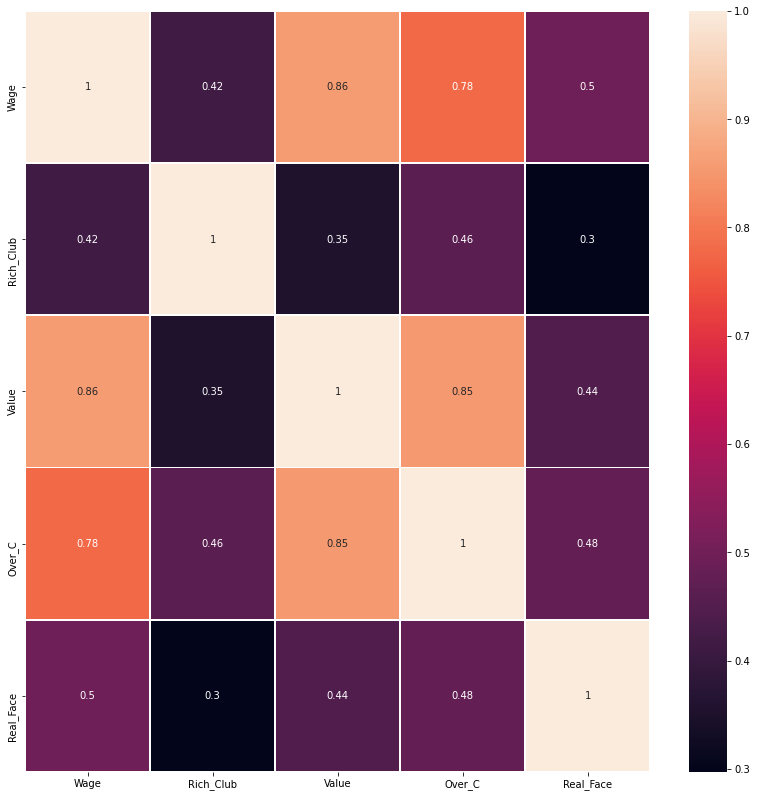

In [349]:
plt.figure(figsize=(14,14))
sns.heatmap(df2.corr(),linewidths=.8, annot=True) 

In [350]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif factor'] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif['features']=df2.columns
vif

,vif factor,features
0,5.012899,Wage
1,3.602316,Rich_Club
2,5.729673,Value
3,6.128404,Over_C
4,1.490880,Real_Face


In [351]:
# 범주화 -> 원핫인코딩
df2.Over_C=df2.Over_C.astype('str')
df2.Real_Face = df2.Real_Face.astype('str')

In [352]:
df_o=pd.get_dummies(df2)

In [353]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

파라미터 구하기

In [354]:
X= df_o.drop(['Wage'],axis = 1)
y= df_o['Wage']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)
# 단순 회귀 분석 모형 생성 및 평가
lr = LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSE: {0:.2f}, RMSE: {1:.2f}, r2 score: {2:.2f}'.format(mse, rmse,r2))

MSE: 116.10, RMSE: 10.77, r2 score: 0.82


In [355]:
params = {'alpha':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,12,15]}

lr = LinearRegression()
rd = Ridge()
ls = Lasso()

models = [rd,ls]
for model in models:
    grid = GridSearchCV(model, param_grid = params, cv=5, scoring = 'neg_mean_squared_error')
    grid.fit(X,y)
    rmse = np.sqrt(-1*grid.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,rmse, grid.best_params_))

Ridge 5 CV 시 최적 평균 RMSE 값: 11.118014460287267, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 11.145513467615455, 최적 alpha:{'alpha': 0.05}


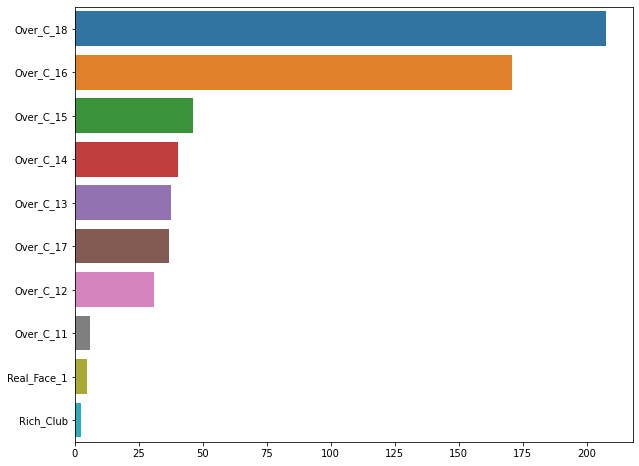

In [356]:
plt.figure(figsize=(10,8))
lr = LinearRegression()
lr.fit(X_train, y_train)
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

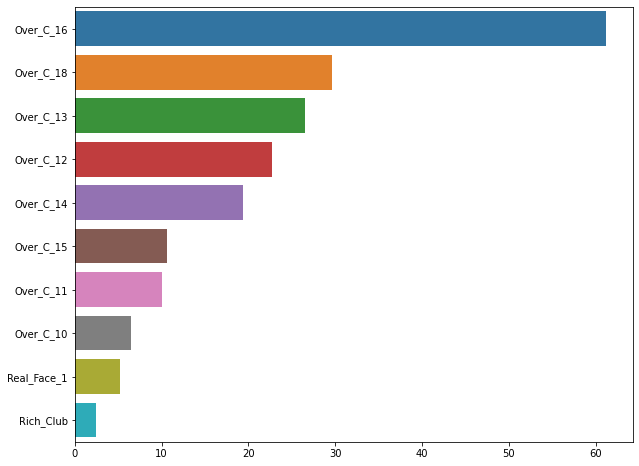

In [357]:
rd = Ridge(5)
rd.fit(X_train, y_train)
plt.figure(figsize=(10,8))
coef = pd.Series(rd.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [358]:
rd_pred= rd.predict(X_test)
mse = mean_squared_error(y_test,rd_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,rd_pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSE: {0:.2f}, RMSE: {1:.2f}, r2 score: {2:.2f}'.format(mse, rmse,r2))

MSE: 140.65, RMSE: 11.86, r2 score: 0.78


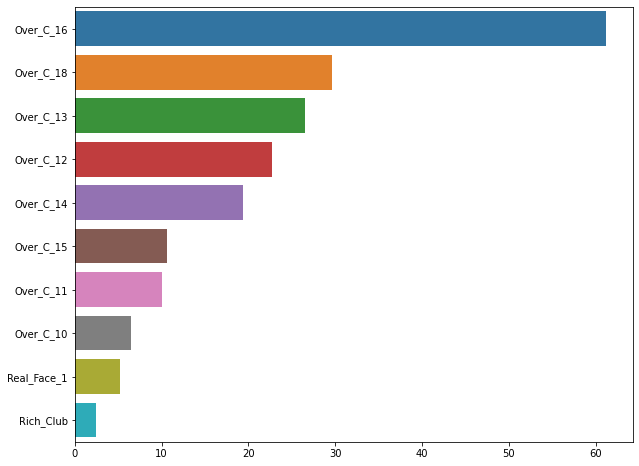

In [359]:
ls = Lasso(0.05)
ls.fit(X_train, y_train)
plt.figure(figsize=(10,8))
coef = pd.Series(rd.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [360]:
ls_pred= ls.predict(X_test)
mse = mean_squared_error(y_test,ls_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,ls_pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSE: {0:.2f}, RMSE: {1:.2f}, r2 score: {2:.2f}'.format(mse, rmse,r2))

MSE: 156.38, RMSE: 12.51, r2 score: 0.76


In [361]:
RandomForest=RandomForestRegressor(n_estimators=1000,criterion='mse').fit(X_train,y_train)
rf_pred = RandomForest.predict(X_test)
mse = mean_squared_error(y_test,rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,rf_pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSE: {0:.2f}, RMSE: {1:.2f}, r2 score: {2:.2f}'.format(mse, rmse,r2))


MSE: 145.96, RMSE: 12.08, r2 score: 0.78


In [362]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [363]:
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                              np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [364]:
params = {'n_estimators':[800,1000, 1200]}

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

In [365]:
import warnings
warnings.filterwarnings('ignore')

In [366]:
# best estimator 사용
best_xgb = get_best_params(xgb_reg, params)
best_lgbm = get_best_params(lgbm_reg, params)
models = [best_xgb,best_lgbm]
for model in models:
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test,pred)
    print(model.__class__.__name__, 'RMSE: {0:.4f}, R2 score: {1:.4f}'.format(rmse,r2))

[04:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:40:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [367]:
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
    ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
    return ftr_top10

In [368]:
def visualize_ftr_importances(models):
  plt.figure(figsize=(10,8))
  ftr_top10 = get_top_features(model)
  sns.barplot(x=ftr_top10.values, y=ftr_top10.index)

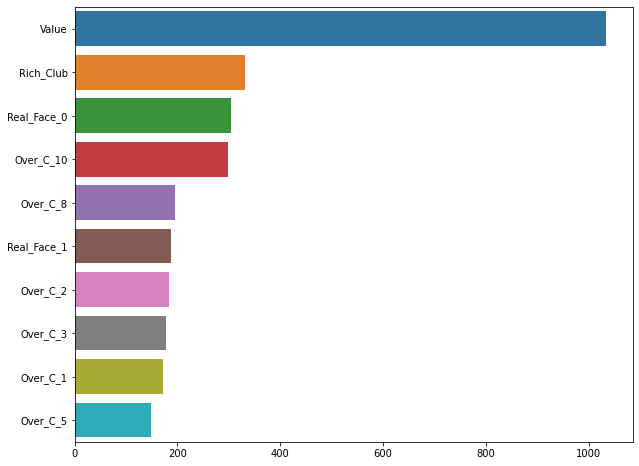

In [369]:
visualize_ftr_importances(best_xgb)

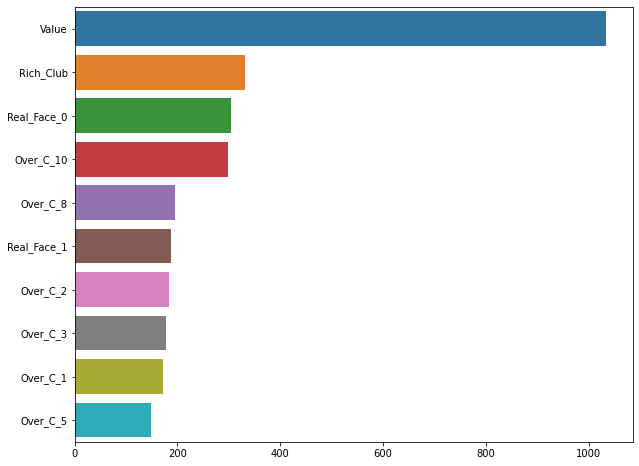

In [370]:
visualize_ftr_importances(best_lgbm)